In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
path = "C:/Users/parit/Downloads/iphone_purchase_records.csv"
target_column = "Purchase Iphone"
data = pd.read_csv(path)
df = data.copy()

# Encode categorical variable
lb = LabelEncoder()
df["Gender"] = lb.fit_transform(df["Gender"])

# Features and Target
x = df.drop(columns=[target_column])
y = df[target_column]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# KNN Error Tracking
error = []
k_values = []
best_k = 1
min_error = float('inf')

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    err = 1 - accuracy_score(y_test, pred_i)
    error.append(err)
    k_values.append(i)
    
    if err < min_error:
        min_error = err
        best_k = i

# Train final model with best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
model_final = knn_final.fit(x_train, y_train)
pred = model_final.predict(x_test)
accuracy = accuracy_score(y_test, pred)

print(f"Best k: {best_k}")
print(f"Final Accuracy: {accuracy:.2f}")

Best k: 5
Final Accuracy: 0.82


## EDA

<Axes: xlabel='Gender', ylabel='count'>

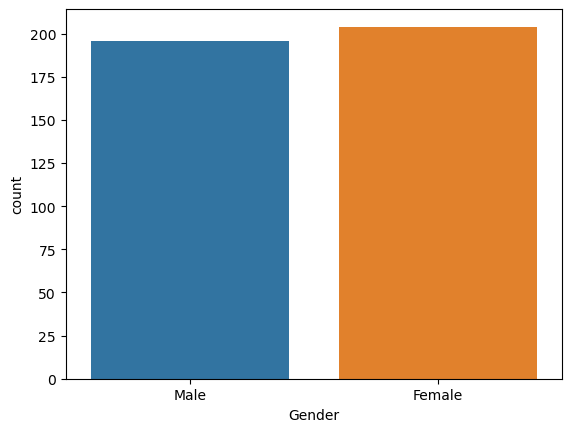

In [2]:
sns.countplot(x=data.Gender,data=data)

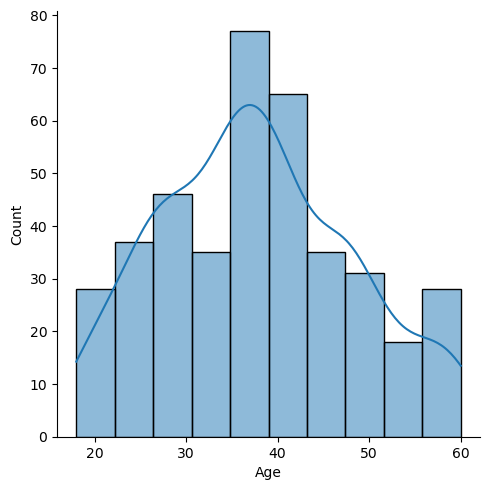

In [3]:
sns.displot(x=data.Age,data=data,kde=True)

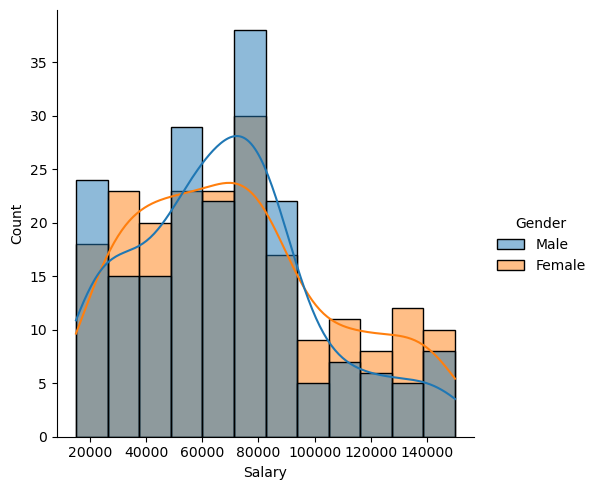

In [4]:
sns.displot(x=data.Salary,hue=data.Gender,data=data,kde=True)

<Axes: xlabel='Age', ylabel='Salary'>

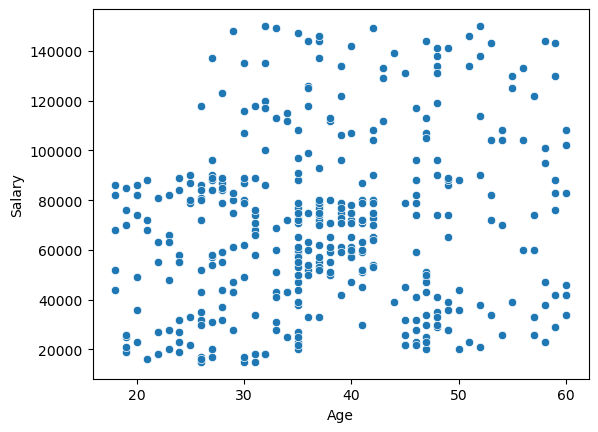

In [5]:
sns.scatterplot(x=data.Age,y=data.Salary,data=data)

<Axes: xlabel='Purchase Iphone', ylabel='count'>

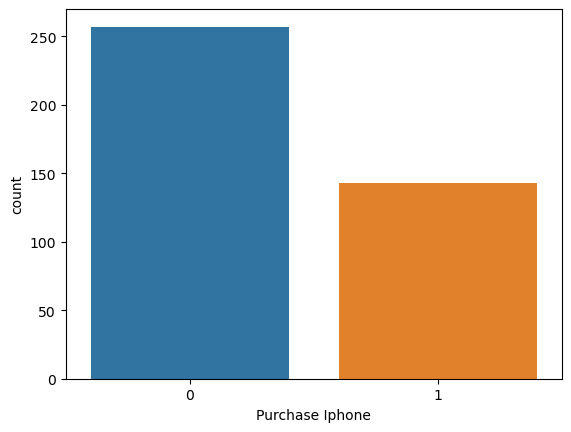

In [6]:
sns.countplot(x=data["Purchase Iphone"],data=data)

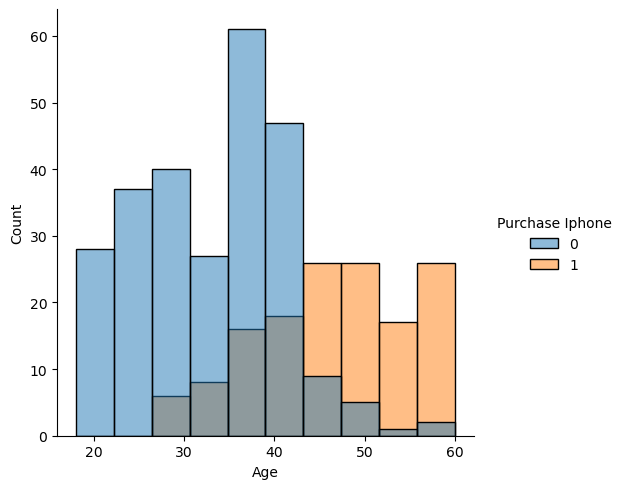

In [7]:
sns.displot(x=data.Age,hue=data["Purchase Iphone"],data=data)

C:\Users\parit\AppData\Local\Temp\ipykernel_24784\3284826886.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),vmin=-1,annot=True)


<Axes: >

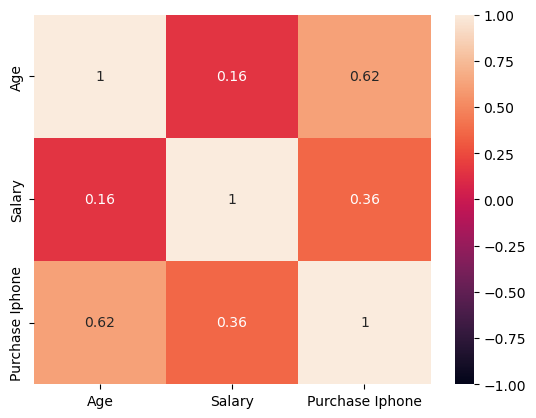

In [8]:
sns.heatmap(data.corr(),vmin=-1,annot=True)